In [157]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # can change this
#from sklearn.svm import svm # can change this
import sklearn.svm as svm
import seaborn as sns
from scipy import stats

In [158]:
# Import training data
training_data_name = 'C:/Users/rmi18/Documents/Learning/Hackathon_Autumn2020_Challenge/challenge_dataset/train_data_imputed.csv'
training_dataset = pd.read_csv(training_data_name, index_col=0)
#print(training_dataset)

In [159]:
# Import unseen data
unseen_data_name = 'C:/Users/rmi18/Documents/Learning/Hackathon_Autumn2020_Challenge/challenge_dataset/unseen_data_imputed.csv'
unseen_dataset = pd.read_csv(unseen_data_name, index_col=0)
#print(unseen_dataset)

In [198]:
# Describe the training data
training_dataset.describe()

,BMXWT,BMXBMI,BMXWAIST,ALQ120Q,BPXSAR,BPXDAR,RIDAGEMN,INDFMPIR,DRXTKCAL,DRXTPROT,...,MCQ160K,MCQ160L,MCQ220,MCQ250A,MCQ250B,MCQ250C,MCQ250E,MCQ250F,MCQ250G,mortstat
count,791.000000,791.000000,791.000000,7.910000e+02,791.000000,7.910000e+02,791.000000,7.910000e+02,791.00000,791.000000,...,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,84.854337,30.882648,106.015940,2.051307e+00,136.805962,6.807206e+01,773.538559,2.128006e+00,1726.92228,74.419772,...,1.950695,1.950695,1.881163,1.448799,2.022756,1.964602,2.242731,2.178255,2.189633,0.539823
std,19.232612,6.309490,13.831242,6.923166e+00,20.446664,1.580684e+01,134.344214,1.358327e+00,802.12481,37.561909,...,0.434402,0.343248,0.419206,1.290509,0.947742,1.080910,1.523402,1.825927,1.490712,0.498727
min,38.900000,17.430000,65.900000,5.400000e-79,80.000000,5.400000e-79,480.000000,5.400000e-79,11.78000,0.040000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,72.150000,26.599200,96.700000,5.400000e-79,123.000000,6.137200e+01,679.000000,1.100000e+00,1207.00000,49.690000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,81.900000,29.690000,104.600000,1.000000e+00,135.000000,6.900000e+01,784.000000,1.760000e+00,1666.82000,72.370000,...,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,95.946080,34.403400,114.369400,2.016000e+00,146.000000,7.700000e+01,875.000000,2.775000e+00,2026.81000,87.303500,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,191.100000,66.440000,157.700000,1.500000e+02,216.000000,1.110000e+02,1016.000000,5.000000e+00,8450.00000,456.380000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000


In [199]:
# get info
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 10004 to 999
Columns: 110 entries, BMXWT to mortstat
dtypes: float64(51), int64(59)
memory usage: 685.9 KB


In [200]:
# exclude outliers
training_new = training_dataset[(np.abs(stats.zscore(training_dataset)) < 3).all(axis=1)]
training_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 10004 to 9988
Columns: 110 entries, BMXWT to mortstat
dtypes: float64(51), int64(59)
memory usage: 294.0 KB


In [201]:
training_dataset.groupby('mortstat').mean()
#training_new.groupby('mortstat').mean()

,BMXWT,BMXBMI,BMXWAIST,ALQ120Q,BPXSAR,BPXDAR,RIDAGEMN,INDFMPIR,DRXTKCAL,DRXTPROT,...,MCQ160J,MCQ160K,MCQ160L,MCQ220,MCQ250A,MCQ250B,MCQ250C,MCQ250E,MCQ250F,MCQ250G
mortstat,,,,,,,,,,,,,,,,,,,,,
0,85.680156,31.063372,104.928935,2.392516,132.880066,71.320209,709.692308,2.346120,1800.357572,77.268724,...,1.395604,1.939560,1.934066,1.945055,1.409341,2.008242,1.895604,2.148352,1.972527,2.054945
1,84.150360,30.728588,106.942567,1.760440,140.152628,65.303148,827.964871,1.942073,1664.321702,71.991157,...,1.482436,1.960187,1.964871,1.826698,1.482436,2.035129,2.023419,2.323185,2.353630,2.304450


In [202]:
df1 = training_dataset[training_dataset['mortstat'] == 1] # deceased
df2 = training_dataset[training_dataset['mortstat'] == 0] # alive

In [203]:
# run ttest to compare means between deceased/alive for each variable
res = stats.ttest_ind(df1, df2, equal_var=True)
print(res.pvalue)

[2.65119963e-01 4.57356247e-01 4.11979413e-02 2.00810766e-01
 5.14001162e-07 7.45146122e-08 1.31027098e-38 2.80264976e-05
 1.73442221e-02 4.88290564e-02 2.68067674e-02 5.83245758e-02
 1.95744776e-01 8.41598402e-02 2.27342796e-02 3.93266360e-01
 7.63562131e-02 5.34089816e-01 3.98825978e-01 1.70024732e-02
 8.16515575e-01 1.23108528e-01 5.84617190e-01 1.32272242e-02
 8.16941265e-01 3.77694253e-01 1.73289498e-02 5.49111789e-01
 7.26526275e-01 4.85809799e-01 9.53293808e-07 5.86126197e-08
 3.39151810e-01 2.23241410e-01 3.91807875e-01 9.31967037e-02
 6.31778556e-01 7.81846032e-04 2.38961444e-01 2.60924193e-03
 1.48168731e-02 8.50244237e-01 8.11106715e-01 1.95068174e-08
 4.99623639e-02 4.06788513e-01 2.90303367e-03 9.80951708e-01
 5.56199080e-09 7.04476152e-08 1.26419088e-02 5.04122462e-09
 1.19255716e-02 4.04072562e-02 1.95852869e-01 9.67341148e-01
 5.15578482e-03 4.30623318e-01 1.61250217e-02 3.60622768e-05
 4.00488495e-04 3.65093512e-01 3.15918265e-01 2.00893014e-04
 7.97694319e-02 3.865875

In [204]:
# use pvalue to subselect variables with statistically different means (p < 0.05)
df1_sub = df1.loc[:,res.pvalue < 0.05]
training_sub = training_dataset.loc[:,res.pvalue < 0.05]
#training_sub = training_new.loc[:,res.pvalue < 0.05]
df1_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 10101 to 999
Data columns (total 51 columns):
BMXWAIST         427 non-null float64
BPXSAR           427 non-null float64
BPXDAR           427 non-null float64
RIDAGEMN         427 non-null int64
INDFMPIR         427 non-null float64
DRXTKCAL         427 non-null float64
DRXTPROT         427 non-null float64
DRXTCARB         427 non-null float64
DRXTPFAT         427 non-null float64
DRXTFOLA         427 non-null float64
DRXTMAGN         427 non-null float64
DRXTCAFF         427 non-null float64
LBXCPSI          427 non-null float64
LBXIN            427 non-null float64
URXUMASI         427 non-null float64
LBXSATSI         427 non-null float64
LBXSAPSI         427 non-null float64
LBXT4            427 non-null float64
LBXTSH           427 non-null float64
LBXHGB           427 non-null float64
RXD295           427 non-null float64
TELOMEAN         427 non-null float64
TELOSTD          427 non-null float64
Nr_of_drugs      42

In [209]:
# Get features and target
tmp = list(df1.columns)
#tmp = list(df1_sub.columns) #-- uncomment to only use features which have statistically different means between two groups
targets = tmp.pop(-1)
features = tmp

print(features)
print(targets)

['BMXWT', 'BMXBMI', 'BMXWAIST', 'ALQ120Q', 'BPXSAR', 'BPXDAR', 'RIDAGEMN', 'INDFMPIR', 'DRXTKCAL', 'DRXTPROT', 'DRXTCARB', 'DRXTTFAT', 'DRXTSFAT', 'DRXTMFAT', 'DRXTPFAT', 'DRXTCHOL', 'DRXTFIBE', 'DRXTVB1', 'DRXTVB2', 'DRXTFOLA', 'DRXTVB12', 'DRXTVC', 'DRXTCALC', 'DRXTMAGN', 'DRXTIRON', 'DRXTZINC', 'DRXTCAFF', 'DRXTALCO', 'LBXGH', 'LBXGLU', 'LBXCPSI', 'LBXIN', 'LBXCRP', 'LBXTC', 'LBDHDL', 'LBXTR', 'LBDLDL', 'URXUMASI', 'URXUCR', 'LBXSATSI', 'LBXSAPSI', 'LBXSGTSI', 'LBXSTB', 'LBXT4', 'LBXTSH', 'LBXWBCSI', 'LBXHGB', 'LBXPLTSI', 'RXD295', 'TELOMEAN', 'TELOSTD', 'Nr_of_drugs', 'fastingwindow', 'BPQ020', 'BPQ040A', 'BPQ080', 'BPXPULS', 'RIAGENDR', 'RIDRETH1', 'DMDBORN', 'DMDEDUC2', 'DMDMARTL', 'INDHHINC', 'DIQ050', 'DIQ070', 'DIQ080', 'DIQ140', 'HID010', 'HID030A', 'HID030B', 'HID030D', 'HID030C', 'HID030E', 'HID040', 'HUQ010', 'KIQ020', 'PAQ180', 'PAD200', 'PAD320', 'PAD440', 'PAQ480', 'PAQ500', 'PAQ520', 'RXD030', 'SMQ040', 'SMD410', 'VIQ030', 'VIQ070', 'WHQ030', 'WHQ040', 'WHQ070', 'MCQ01

In [210]:
# Convert to numpy arrays
X = training_dataset[features].values
Y = training_dataset[targets].values

X1 = df1[features].values
Y1 = df1[targets].values
X2 = df2[features].values
Y2 = df2[targets].values


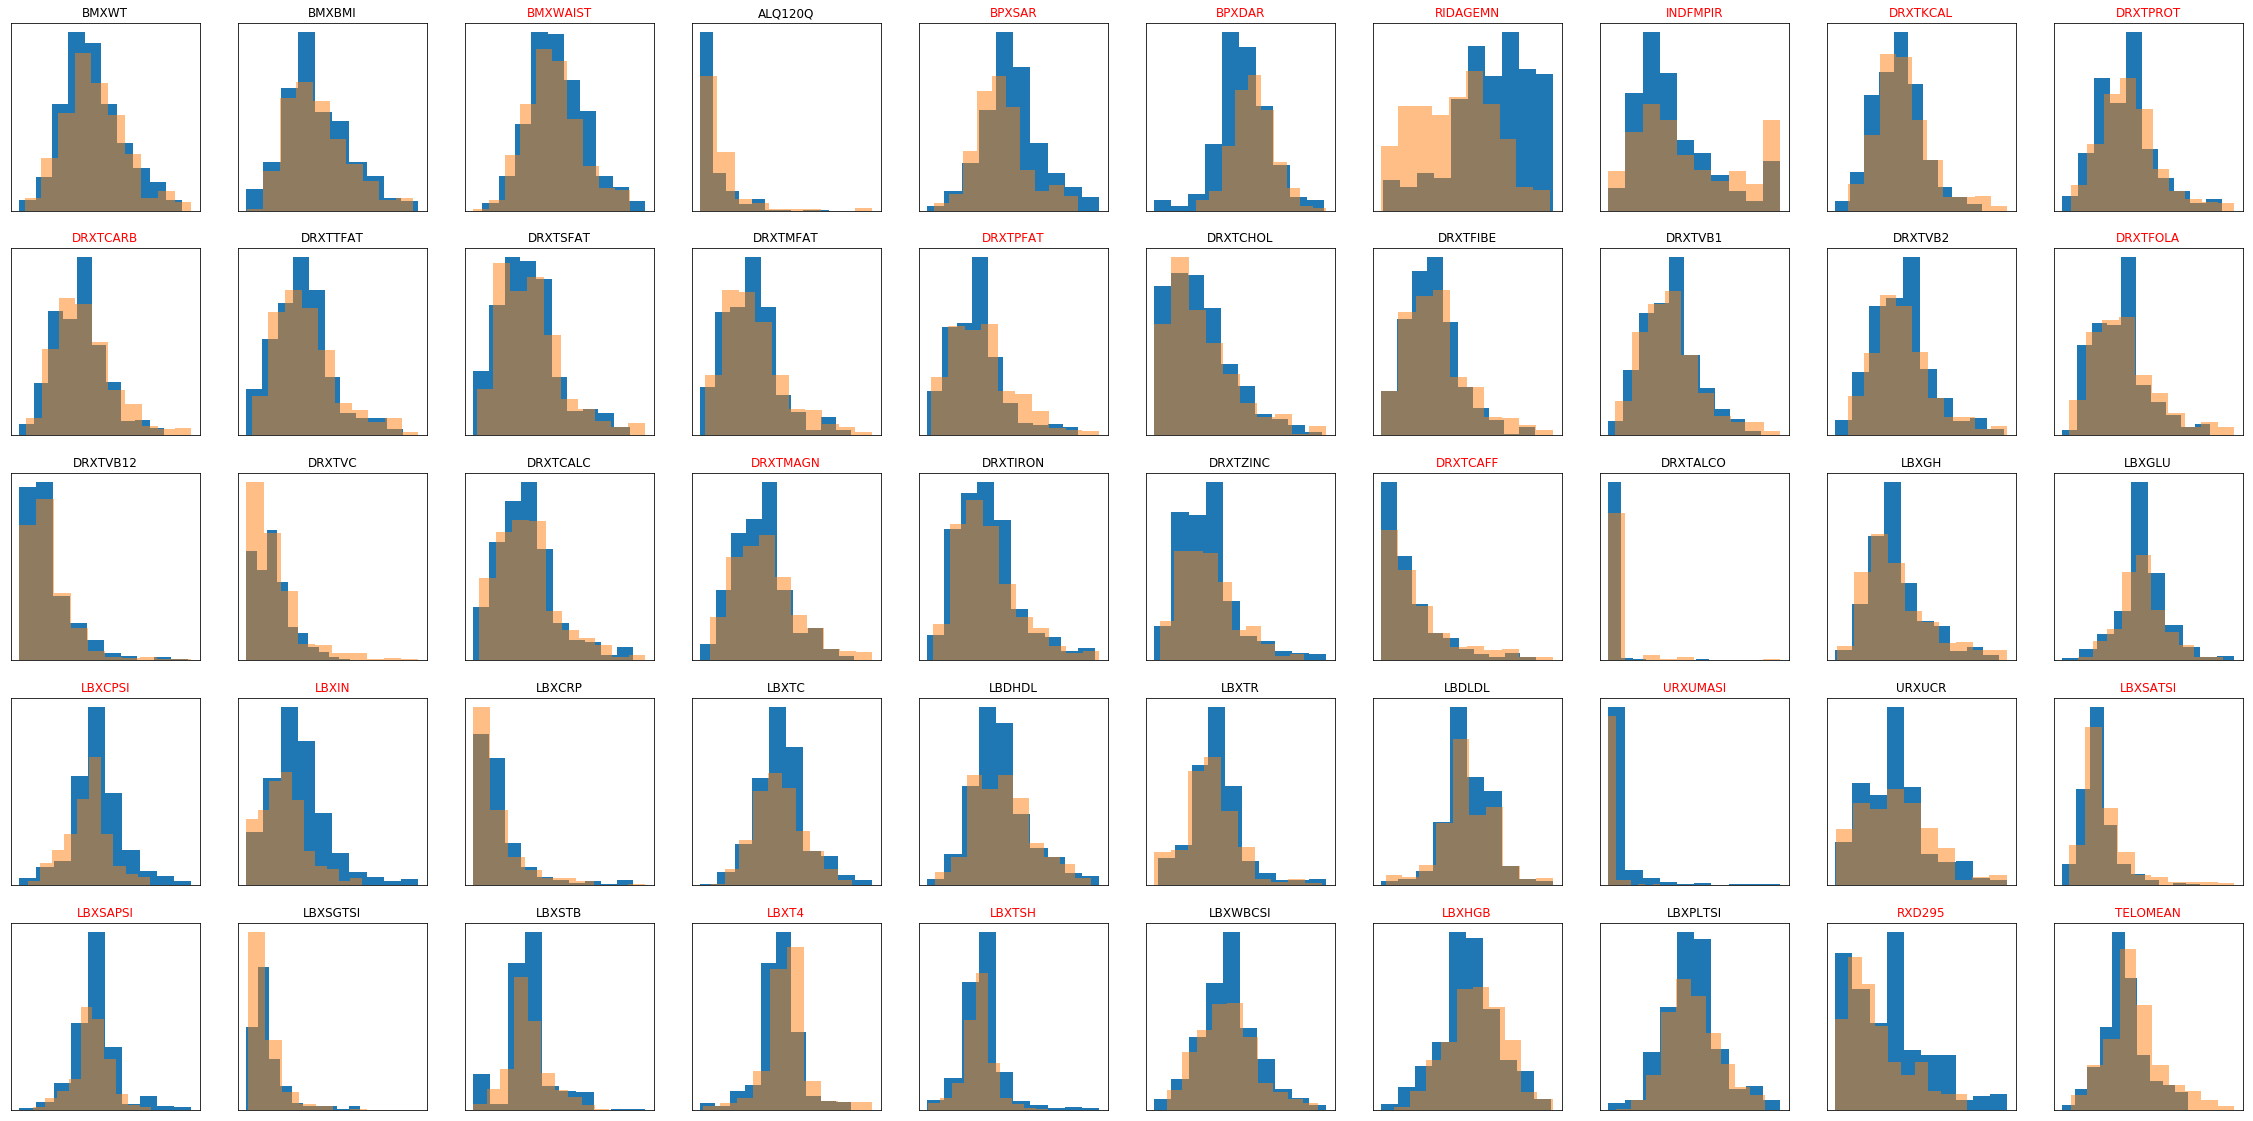

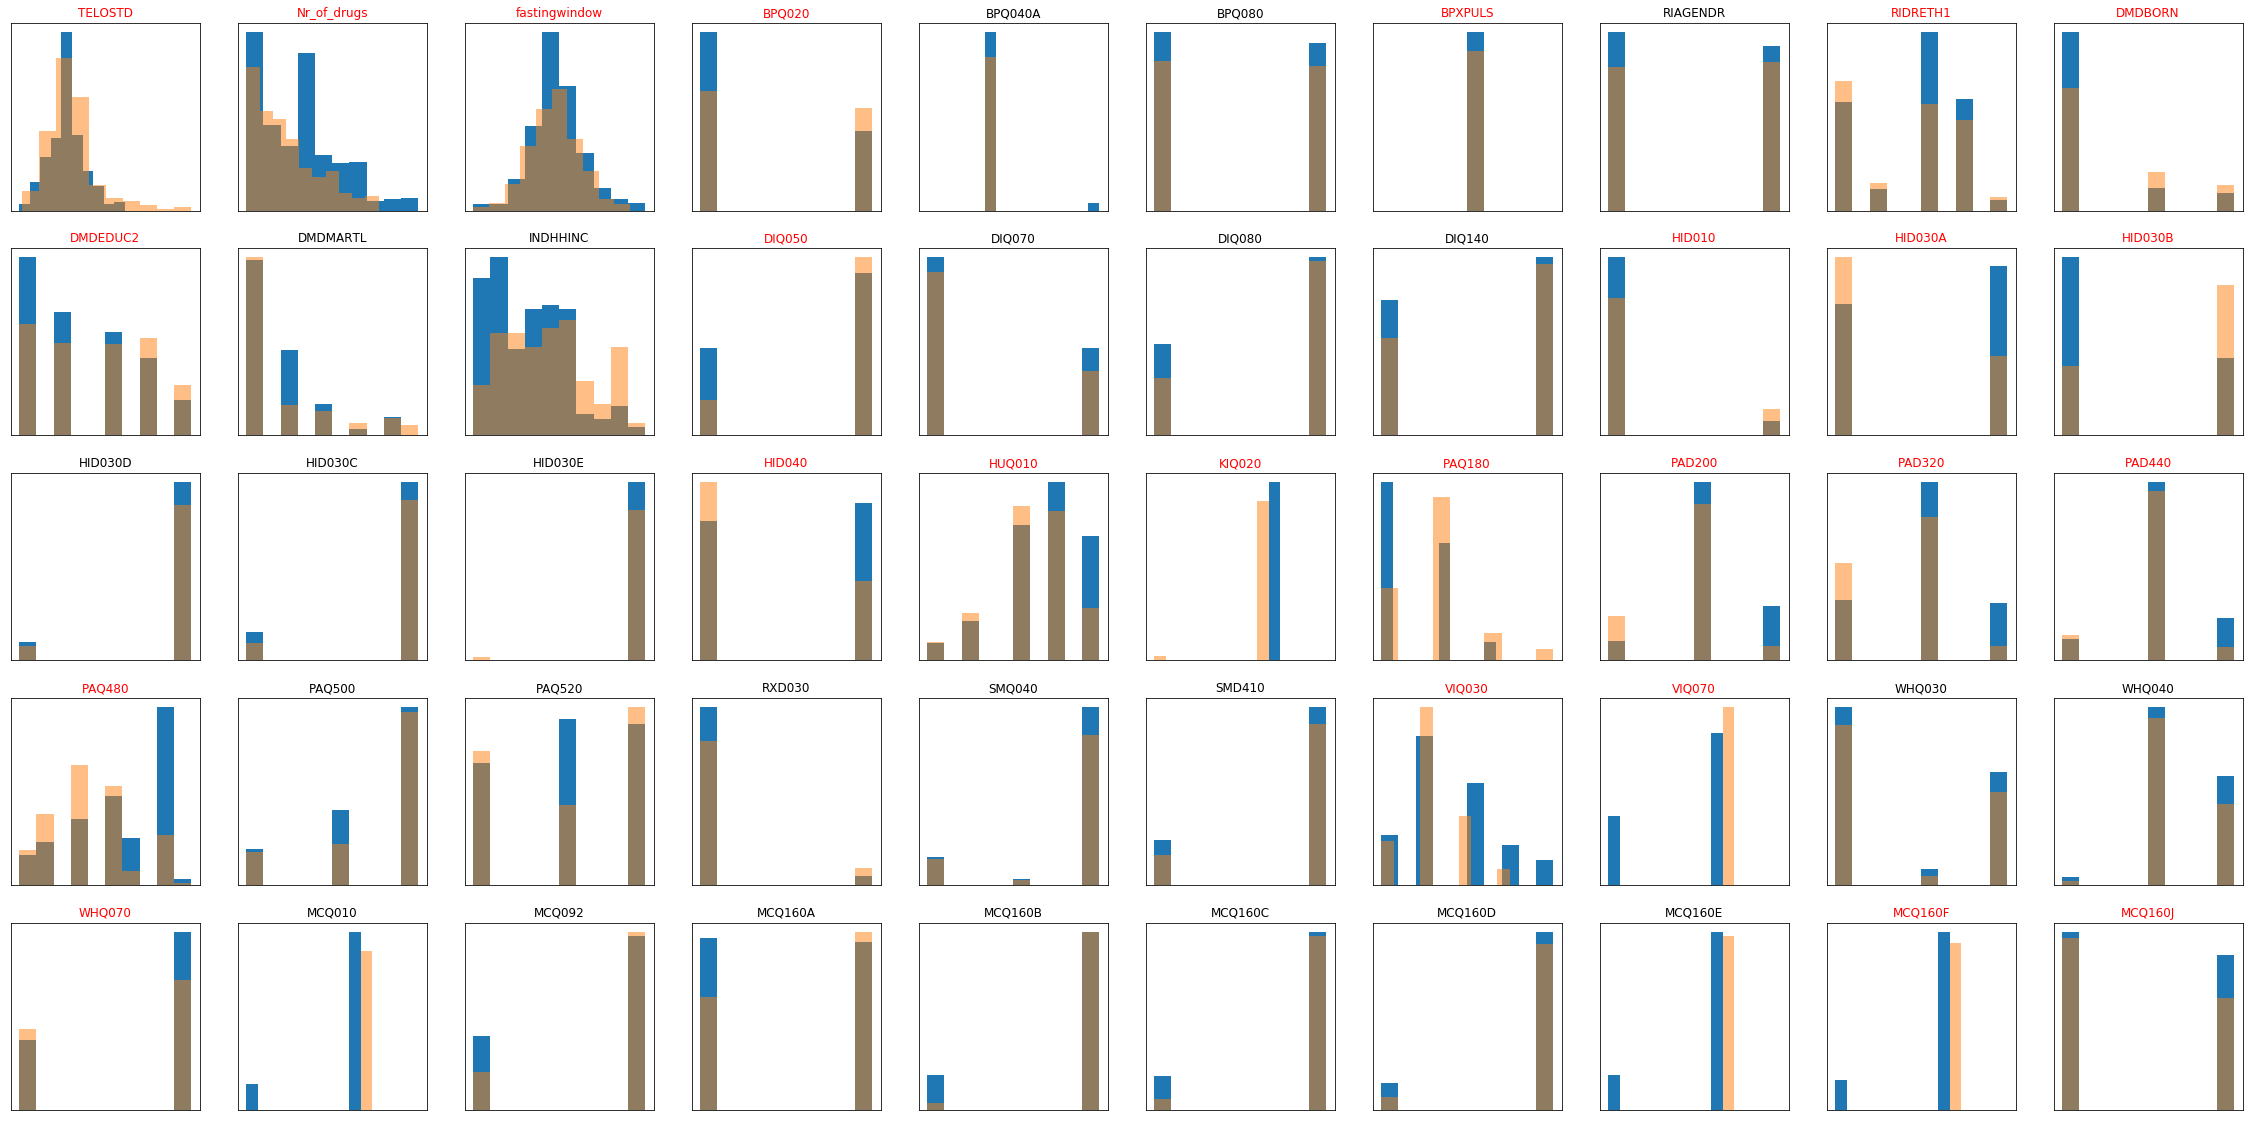

In [211]:
a = 5
b = 10
fig, axs = plt.subplots(a, b, gridspec_kw={'hspace': 0.2, 'wspace': 0.2}, figsize=(40,20))
num = 0
for i in range(a):
    for j in range(b):
        
        ind1 = abs(X1[:,num] - np.mean(X1[:,num])) < 3 * np.std(X1[:,num])
        ind2 = abs(X2[:,num] - np.mean(X2[:,num])) < 3 * np.std(X2[:,num])
        axs[i,j].hist(X1[ind1, num]) # deceased
        axs[i,j].hist(X2[ind2, num], alpha = 0.5) # alive
        axs[i,j].get_yaxis().set_ticks([])
        axs[i,j].get_xaxis().set_ticks([])
        if res.pvalue[num] < 0.05:
            axs[i,j].set_title(features[num], color = 'r')
        else:
            axs[i,j].set_title(features[num], color = 'k')
        num = num + 1
        

fig, axs = plt.subplots(a, b, gridspec_kw={'hspace': 0.2, 'wspace': 0.2}, figsize=(40,20))
for i in range(a):
    for j in range(b):
        
        ind1 = abs(X1[:,num] - np.mean(X1[:,num])) < 3 * np.std(X1[:,num])
        ind2 = abs(X2[:,num] - np.mean(X2[:,num])) < 3 * np.std(X2[:,num])
        axs[i,j].hist(X1[ind1, num]) # deceased
        axs[i,j].hist(X2[ind2, num], alpha = 0.5) # alive
        axs[i,j].get_yaxis().set_ticks([])
        axs[i,j].get_xaxis().set_ticks([])
        if res.pvalue[num] < 0.05:
            axs[i,j].set_title(features[num], color = 'r')
        else:
            axs[i,j].set_title(features[num], color = 'k')
        num = num + 1
        


In [212]:
# Print type and shapes
print(f'Features type: {type(X)}')
print(f'Target type: {type(Y)}')

print(f'Features dimensions: {X.shape}')
print(f'Target dimensions: {Y.shape}')

Features type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Features dimensions: (791, 109)
Target dimensions: (791,)


In [213]:
# Splitting data into train, validate and test
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=10)

print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')

#print(X_train[1:3,1:5])

Training set size: 632
Validation set size: 159


In [214]:
# First, we create an scaler object
scaler = MinMaxScaler()

# Using the method .fit, our scaler will learn statistics about our training set to perform the scaling.
scaler.fit(X_train)

# Finally, we scale our data
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)


In [215]:
# Use linear svc for classification
clf = svm.LinearSVC(random_state=10, tol=1e-10, )
clf.fit(X_train_normalized, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=10, tol=1e-10,
     verbose=0)

In [216]:
# Validate model
pred = clf.predict(X_val_normalized)

In [217]:
# print accuracy 
acc = accuracy_score(y_val, pred)
print(f'Model Accuracy: {acc}')

Model Accuracy: 0.7421383647798742


In [218]:
# run model on unseen data

# Convert to numpy array
Xu = unseen_dataset[features].values
Yu = unseen_dataset[targets].values

# Print type and shapes
print(f'Features type: {type(Xu)}')
print(f'Target type: {type(Yu)}')

print(f'Features dimensions: {Xu.shape}')
print(f'Target dimensions: {Yu.shape}')

X_unseen_normalized = scaler.transform(Xu)
pred_unseen = clf.predict(X_unseen_normalized)

# print accuracy 
acc = accuracy_score(Yu, pred_unseen)
print(f'Model Accuracy: {acc}')

Features type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Features dimensions: (88, 109)
Target dimensions: (88,)
Model Accuracy: 0.7159090909090909


In [219]:
# Use Nu-support Vector for classification
clf2 = svm.NuSVC(random_state=20)
clf2.fit(X_train_normalized, y_train)

# Validate model
pred2 = clf2.predict(X_val_normalized)

# print accuracy 
acc = accuracy_score(y_val, pred2)
print(f'Model Accuracy (validation set): {acc}')

# run model on unseen data
pred_unseen = clf2.predict(X_unseen_normalized)

# print accuracy 
acc = accuracy_score(Yu, pred_unseen)
print(f'Model Accuracy (unseen data): {acc}')

Model Accuracy (validation set): 0.7358490566037735
Model Accuracy (unseen data): 0.7272727272727273


C:\Users\rmi18\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [220]:
# Use C-Support Vector for classification
clf3 = svm.SVC(random_state=30, gamma='scale')
clf3.fit(X_train_normalized, y_train)

# Validate model
pred3 = clf3.predict(X_val_normalized)

# print accuracy 
acc = accuracy_score(y_val, pred3)
print(f'Model Accuracy (validation set): {acc}')

# run model on unseen data
pred_unseen = clf3.predict(X_unseen_normalized)

# print accuracy 
acc = accuracy_score(Yu, pred_unseen)
print(f'Model Accuracy (unseen data): {acc}')

Model Accuracy (validation set): 0.7672955974842768
Model Accuracy (unseen data): 0.7272727272727273
